Cleaning Data in Python

In [ ]:
import pandas as pd

table = pd.read_csv('table.csv')

# Get data types of columns
table.dtypes

# Get information
table.info()

# Print summary stats of column
print(table['column'].describe())

clean the data

In [ ]:
# String to integers
table['column'] = table['column'].str.strip('@@')
table['column'] = table['column'].astype('int')

# Verify that revenue is now an integer
assert table['column'].dtype == 'int'

Data Range Constraints

In [ ]:
# Import date time
import datetime as dt

# Date today
today_date = dt.date.today()

table[table['column_name'] > dt.date.today()]

How to deal with out of range data?

- Dropping data
- Setting custom min's and max's
- Treat as missing and impute
- Setting custom value depending on business assumptions

In [ ]:
import pandas as pd

# Output column_name > 5
table[table['column_name'] > 5]


# Drop value using filtering
data = table[table['column_name'] <= 5]

# Drop value using .drop()
data.drop(table[table['column_name'] > 5].index, inplace=True)

# Assert results
assert table['column_name'].max() <= 5

In [ ]:
# Converting column_name > 5 to 5
table.loc[table['column_name'] > 5, 'column_name'] = 5

In [ ]:
import datetime as dt
import pandas as pd

# Output data types
table.dtypes

# Convert to date
table['column_name'] = pd.to_datetime(table['column_name']).dt.date

Date range example

In [ ]:
date_today = dt.date.today()

Drop the data

In [ ]:
# Drop values using filtering
table = table[table['column_name'] < date_today]

# Drop values using .drop()
table.drop(table[table['column_name'] > date_today].index, inplace=True)

Hardcode dates with upper limit

In [ ]:
# Drop value using filtering
table.loc[table['column_name'] > today_date, 'column_name'] = today_date

# Assert is true
assert table['column_name'].max().date() <= today_date

Uniqueness Constraints

In [ ]:
# Finding duplicate values across all columns
duplicates = table.duplicated()

# Get duplicated rows
duplicates = table.duplicated()
table[duplicates]

In [ ]:
# Output duplicate values
table[duplicates].sort_values(by = 'keyword')

In [ ]:
# drop duplicates
column_names = ['column 1', 'column 2', '...']
duplicates = table.duplicated(subset = column_names, keep = False)
table[duplicates].sort_values(by = 'keyword')

In [ ]:
# Treating duplicate values using groupby() and agg()

column_names = ['column 1', 'column 2', '...']
summaries = {'height': 'max', 'weight': 'mean'}
table = table.groupby(by = column_names).agg(summaries).reset_index()

Membership Constraints

In [ ]:
# Finding inconsistent categories
inconsistent_categories = set(table['column_name'].difference(table['column_name'])) # the difference table is table 2

# Get rows with incosistent categories
incosistent_rows = table['column_name'].isin(inconsistent_categories)

In [ ]:
# Dropping inconsistent categories
inconsistent_categories = set(table['column_name']).difference(table['column_name'])
inconsistent_rows = table['column_name'].isin(inconsistent_categories)
inconsistent_data = table[incosistent_rows]

# Drop inconsistent categories and get consistent data only
consistent_data = table[~incosistent_rows]

Categorial Variables

In [ ]:
# Get the status column
status = table['column_name']
status.value_counts()

# Get value counts on DataFrame
table.groupby('column_name').count()

In [ ]:
# capitalized
table['column_name'] = table['column_name'].str.upper()
table['column_name'].value_counts()

#lowercase
table['column_name'] = table['column_name'].str.upper()
table['column_name'].value_counts()

In [ ]:
# Strip all spaces
table = table['column_name'].str.strip()
table['column_name'].value_counts()

In [ ]:
# Collapsing data into categories
import pandas as pd

# Using qcut()
group = ['a', 'b', 'c']
table['column_name'] = pd.qcut(table['column_name'], q = 3, labels = group)

In [ ]:
import pandas as pd
import numpy as np

# Using cut() - create category ranges and names
ranges = [0, 200000, 50000000000, np.inf]
group = ['a', 'b', 'c']

# Create income group column
table['column_name'] = pd.cut(table['column_name'], bin=ranges, labels=group)

In [ ]:
# Create mapping dictionary and replace
mapping = {'a':'a1', 'b':'b2'}

table['column_name'] = table['column_name'].replace(mapping)

Cleaning text data

In [ ]:
# Sample syntax: replace + with 00
table['phone number'] = table["phone number"].str.replace("+", "00")

# Fixing table number column
digits = table['phone number'].str.len()
table.loc[digits < 10, "phone number"] = np.nan
table

In [ ]:
# Find length of each row in phone number column
sanity_check = table['phone number'].str.len()

# Assert minimum phone number length is 10
assert sanity_check.min() >= 10

# Assert all numbers do not have + or -
assert table['phone number'].str.contains("+|-").any() == False

# Assert returns nothing if the condition passes

In [ ]:
# Replace letters with nothing
table['phone number'] = table['phone number'].str.replace(r'\D+','')

Cross field validation

In [ ]:
# The use of multiple fields in a dataset to sanity check data integrity
sum_classes = table[['column1', 'column2', 'column3']].sum(axis = 1)
cf_equ = sum_classes == table['column']

# Find and filter out rows with inconsistent passenger totals
inconsistent_pass = table[~cf_equ]
consistent_pass = table[cf_equ]

'''''
What to do when we catch inconsistencies?

- Dropping data
- Set to missing and impute
- Apply rules from domain knowledge

'''

Comparing Strings

In [1]:
# Fuzz used for string comparison
from thefuzz import fuzz

# Compare reeding vs reading
fuzz.WRatio('Reeding','Reading')

86

Record Linkage

In [ ]:
# Blocking
table1 = 'for the sake of example'
table2 = 'for the sake of example'


import recordlinkage

# Create indexing object
indexer = recordlinkage.Index()

# Gennerate paris blocked on state
indexer.block('state')
pairs = indexer.index(table1, table2)

# Create a compare object
compare_cl = recordlinkage.Compare()

# Find exact matches for pairs of column1 and column2
compare_cl.extract('column1','column1', label='column1')
compare_cl.extract('column2','column2', label='column2')

# Find similar matches for pairs using string similarity
compare_cl.string('column3','column3', threshold=0.85, label='column3')
compare_cl.string('column4','column4', threshold=0.85, label='column4')

# Find matches
potential_matches = compare_cl.compute(pairs, table1, table2)

Linking DataFrames

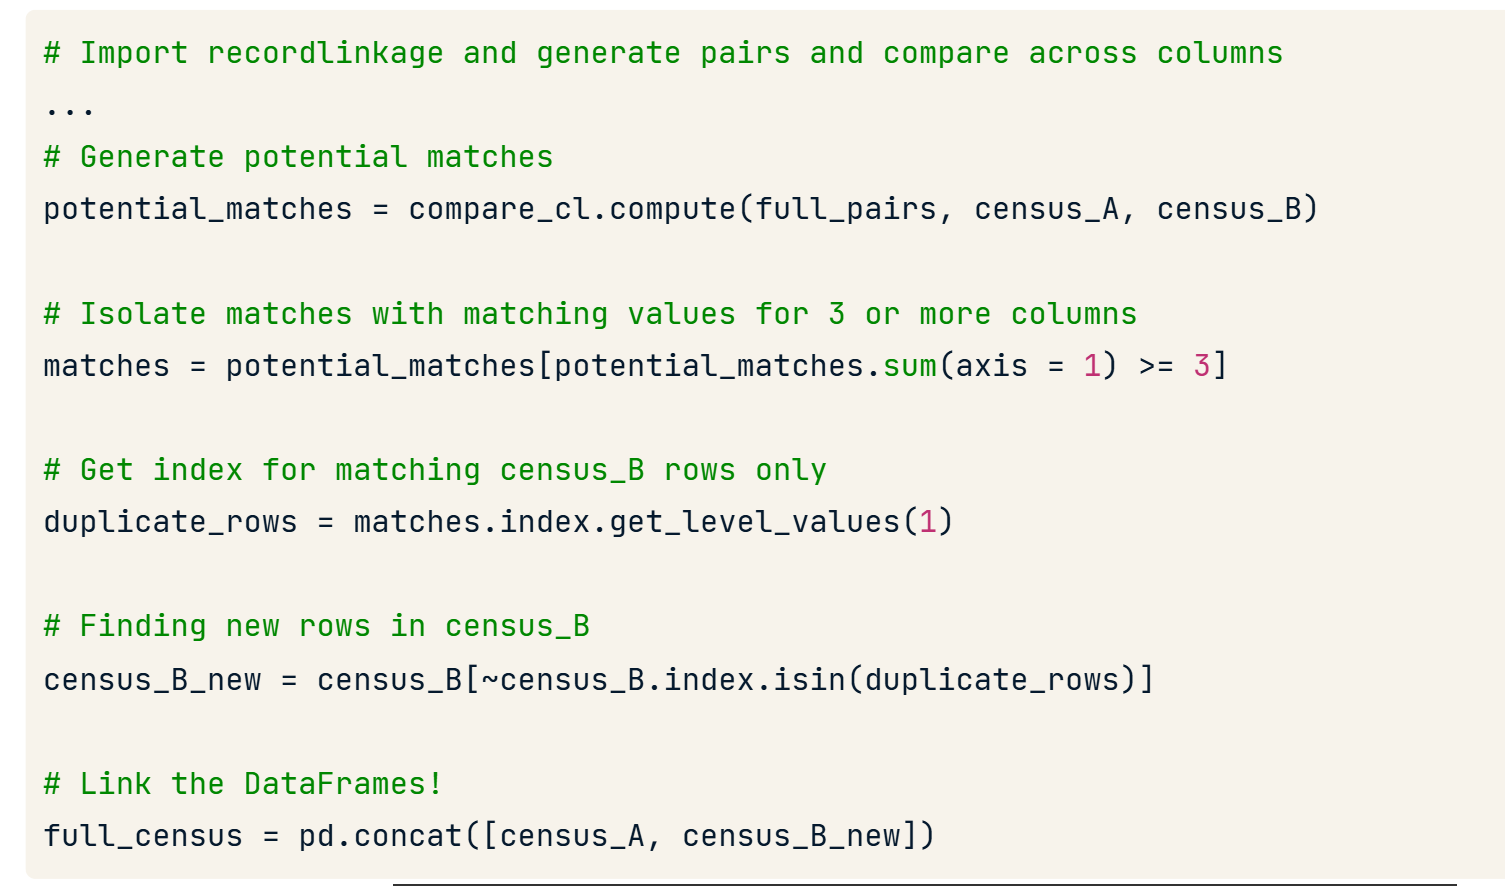